<a href="https://colab.research.google.com/github/andisutrakhusnulkarima/DeepLearning/blob/main/week7/Bidirectional_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [5]:
from google.colab import files

# Memungkinkan Anda untuk mengupload file
uploaded = files.upload()

# Memeriksa file yang diupload
import os
os.listdir('/content')


Saving DeteksiSarkasme_corrected (1).csv to DeteksiSarkasme_corrected (1).csv
Saving ReviewTokoBaju (1).csv to ReviewTokoBaju (1).csv


['.config',
 'tuner',
 'DeteksiSarkasme_corrected (1).csv',
 'ReviewTokoBaju (1).csv',
 'sample_data']

In [6]:
import os

# Memeriksa file yang ada di direktori /content
os.listdir('/content')


['.config',
 'tuner',
 'DeteksiSarkasme_corrected (1).csv',
 'ReviewTokoBaju (1).csv',
 'sample_data']

In [7]:
import pandas as pd

# Memuat dataset ReviewTokoBaju.csv
file_path_review_toko_baju = '/content/ReviewTokoBaju (1).csv'
data_review = pd.read_csv(file_path_review_toko_baju)

# Memuat dataset DeteksiSarkasme.csv
file_path_sarkasme = '/content/DeteksiSarkasme_corrected (1).csv'
data_sarkasme = pd.read_csv(file_path_sarkasme)

# Menampilkan beberapa baris pertama dari kedua dataset untuk memastikan struktur data
print("Data ReviewTokoBaju:")
print(data_review.head())

print("\nData Deteksi Sarkasme:")
print(data_sarkasme.head())


Data ReviewTokoBaju:
   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate 

In [8]:
# 1. Memuat dataset ReviewTokoBaju.csv
file_path_review_toko_baju = '/content/ReviewTokoBaju (1).csv'
data_review = pd.read_csv(file_path_review_toko_baju)

# Memuat dataset DeteksiSarkasme.csv
file_path_sarkasme = '/content/DeteksiSarkasme_corrected (1).csv'
data_sarkasme = pd.read_csv(file_path_sarkasme)

In [9]:
# Menghapus baris yang memiliki NaN pada kolom 'Review Text'
data_review = data_review.dropna(subset=['Review Text'])

# Memastikan bahwa semua data di 'Review Text' adalah string
data_review.loc[:, 'Review Text'] = data_review['Review Text'].astype(str)

# Menambahkan kolom 'Sentiment' dengan menggunakan .loc[]
data_review.loc[:, 'Sentiment'] = data_review['Rating'].apply(lambda x: 1 if x > 3 else 0)

# Melanjutkan preprocessing seperti sebelumnya
tokenizer_review = Tokenizer()
tokenizer_review.fit_on_texts(data_review['Review Text'])
X_review = tokenizer_review.texts_to_sequences(data_review['Review Text'])
X_review = pad_sequences(X_review, maxlen=100, padding='post')

y_review = data_review['Sentiment'].values

# Membagi data menjadi set pelatihan dan pengujian
X_train_review, X_test_review, y_train_review, y_test_review = train_test_split(X_review, y_review, test_size=0.2, random_state=42)

# Menampilkan beberapa baris data untuk memverifikasi hasil preprocessing
data_review.head()


<ipython-input-9-398c946e73fb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_review.loc[:, 'Sentiment'] = data_review['Rating'].apply(lambda x: 1 if x > 3 else 0)


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


283/283 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8013 - loss: 0.4695 - val_accuracy: 0.8898 - val_loss: 0.2602
Epoch 2/5
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9062 - loss: 0.2302 - val_accuracy: 0.8781 - val_loss: 0.2847
Epoch 3/5
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9339 - loss: 0.1736 - val_accuracy: 0.8812 - val_loss: 0.2697
Epoch 4/5
283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9541 - loss: 0.1276 - val_accuracy: 0.8814 - val_loss: 0.3197
Epoch 5/5
283/283 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9689 - loss: 0.0924 - val_accuracy: 0.8759 - val_loss: 0.3533
142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report for ReviewTokoBaju:
              precision    recall  f1-score   support

           0       0.76      0.68      0.72      1045
           1       0.91      0.94      0.92      3484

    accuracy                           0.88      4529
   macro avg       0.83      0.81      0.82      4529
weighted avg   

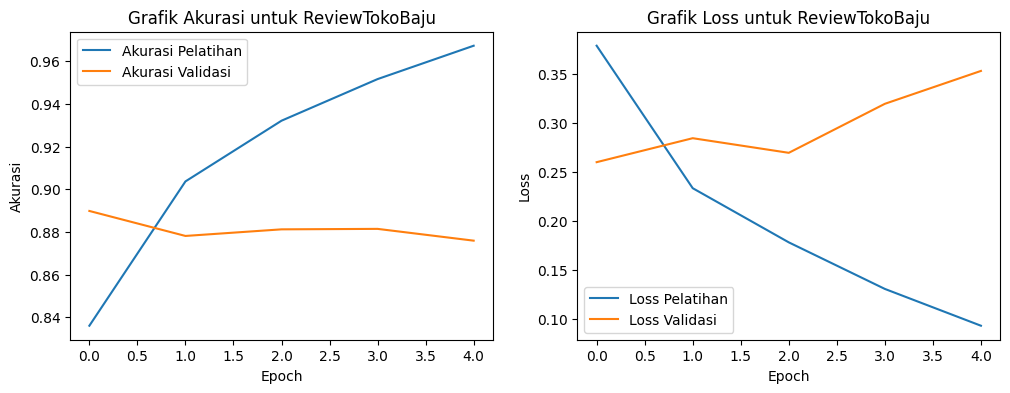

In [12]:
# Membuat model Deep RNN dengan Bidirectional LSTM
def build_model():
    model = models.Sequential([
        layers.Embedding(input_dim=len(tokenizer_review.word_index) + 1, output_dim=128, input_length=100),
        layers.Bidirectional(layers.LSTM(64, return_sequences=True)),
        layers.GlobalMaxPooling1D(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Membangun dan melatih model untuk ReviewTokoBaju
model_review = build_model()
history_review = model_review.fit(X_train_review, y_train_review, epochs=5, batch_size=64, validation_data=(X_test_review, y_test_review))

# Evaluasi model untuk ReviewTokoBaju
y_pred_review = (model_review.predict(X_test_review) > 0.5).astype("int32")
print("Classification Report for ReviewTokoBaju:")
print(classification_report(y_test_review, y_pred_review))

# Visualisasi Akurasi dan Loss untuk ReviewTokoBaju
plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history_review.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history_review.history['val_accuracy'], label='Akurasi Validasi')
plt.title('Grafik Akurasi untuk ReviewTokoBaju')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_review.history['loss'], label='Loss Pelatihan')
plt.plot(history_review.history['val_loss'], label='Loss Validasi')
plt.title('Grafik Loss untuk ReviewTokoBaju')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [2]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.1 MB/s eta 0:00:00


In [13]:
model_review.save('model_review_toko_baju.h5')
